## Критерий Ирвина

При нормальном распределении исследуемого показателя для оценки элементов выборки на грубые ошибки (грубые погрешности) часто используют критерий Ирвина (иногда указывают, что критерий Ирвина может применяться при любом распределении или просто не учитывают вид распределения, но это ошибочный подход). В вариационном ряду значений выборки оценивают сомнительное значение на одном из концов ряда. Для этого вычисляют расчётное значение критерия Ирвина:

Пороговое значнеие равно = 1.3

In [5]:
l=1.3

In [1]:
import numpy as np
import math
data = np.array([100,142.77,124.92,115.21,113.02,110.01,105.08,100.8,104.57,105.28,103.03,100.5,101.31,103.03,101,143.81,123.27,116,107.3],float)
avg = data.mean()
sto = np.nanstd(data,ddof=1)
disp = np.nanvar(data)
for i in range(1,len(data)):
    lamda = abs(data[i]-data[i-1])/sto
    if(lamda > 1.3):
        print('аномальное значение - {}'.format(data[i]))
    else:
        print('значение в порядке нормы - {}'.format(data[i]))


аномальное значение - 142.77
аномальное значение - 124.92
значение в порядке нормы - 115.21
значение в порядке нормы - 113.02
значение в порядке нормы - 110.01
значение в порядке нормы - 105.08
значение в порядке нормы - 100.8
значение в порядке нормы - 104.57
значение в порядке нормы - 105.28
значение в порядке нормы - 103.03
значение в порядке нормы - 100.5
значение в порядке нормы - 101.31
значение в порядке нормы - 103.03
значение в порядке нормы - 101.0
аномальное значение - 143.81
аномальное значение - 123.27
значение в порядке нормы - 116.0
значение в порядке нормы - 107.3


# Построение автокорреляционной функции

In [125]:
#автокорреляция
import pandas as pd
yt = [5.6,4.7,5.2,9.1,7.0,5.1,6.0,10.2,8.2,5.6,6.4,10.8,9.1,6.7,7.5,11.3]
yt_1 = yt[0:15:1]
yt_1.insert(0,0)

Рассчитаем коэффициент автокорреляции уровней ряда первого порядка, то есть между соседними уровнями ряда yt и yt-1 (лаг = 1), и измерим тесноту связи между объёмом потребления электроэнергии в текущем и предыдущем году.

Для этого составим таблицу расчётных данных.

Расчёт коэффициента автокорреляции первого порядка для временного ряда объемов потребления электроэнергии жителями региона:


In [186]:
#Рассчитаем выборочные средние :
vib_sr1 = sum(yt[1::])/(len(yt)-1)
vib_sr2 = sum(yt_1[1::])/(len(yt_1)-1)
print('выборочное среднее y1={} и y2={}'.format(vib_sr1,vib_sr2))

выборочное среднее y1=7.526666666666666 и y2=7.1466666666666665


In [187]:
#Определим коэффициент автокорреляции уровней ряда первого порядка:

def multF(x,y):
    return [x[i]*y[i] for i in range(len(x))]

minusF1 = [i-vib_sr1 for i in yt[1::]]
minusF2 = [i-vib_sr2 for i in yt_1[1::]]
minus_powF1 = [(i-vib_sr1)**2 for i in yt[1::]]
minus_powF2 = [(i-vib_sr2)**2 for i in yt_1[1::]]
r1 = sum(multF(minusF1,minusF2)) / np.sqrt((sum(minus_powF1)*sum(minus_powF2)))
r1


0.19169993295107782

Полученное значение свидетельствует об очень слабой зависимости текущих уровней ряда от непосредственно им предшествующих уровней.

In [192]:
    res=[] # автокоррелцяцонная функция 
    res.append(r1)
    for i in range(2,9):
        yt_n = yt[0:(16-i):1]
        for k in range(i):
            yt_n.insert(0,0)
        vib_srn = sum(yt_n[i::])/(len(yt_n)-i)
        vib_sr1 = sum(yt[i::])/(len(yt)-i)  
        minusF1 = [i-vib_sr1 for i in yt[i::]]
        minusF2 = [i-vib_srn for i in yt_n[i::]]
        minus_powF1 = [(i-vib_sr1)**2 for i in yt[i::]]
        minus_powF2 = [(i-vib_srn)**2 for i in yt_n[i::]]
        res.append(sum(multF(minusF1,minusF2)) / np.sqrt((sum(minus_powF1)*sum(minus_powF2))))



Text(0.5, 0, 'Лаг')

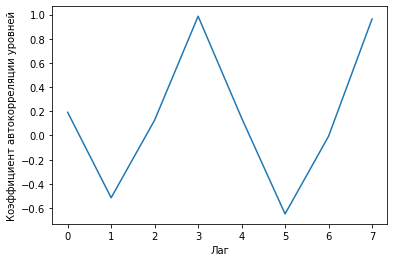

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(0,8),res)
plt.ylabel('Коэффициент автокорреляции уровней')
plt.xlabel('Лаг')

Анализ значений автокорреляционной функции позволяет сделать вывод о наличии в изучаемом временном ряде линейной тенденции и сезонных колебаний периодичностью в 4 квартала.